In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load Dataset
df = pd.read_csv("data/studentdata_featured.csv")

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999997 entries, 0 to 999996
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   999997 non-null  int64  
 1   Grade                 999997 non-null  int64  
 2   Gender                999997 non-null  object 
 3   Race                  999997 non-null  object 
 4   SES_Quartile          999997 non-null  int64  
 5   ParentalEducation     999997 non-null  object 
 6   SchoolType            999997 non-null  object 
 7   Locale                999997 non-null  object 
 8   TestScore_Math        999997 non-null  float64
 9   TestScore_Reading     999997 non-null  float64
 10  TestScore_Science     999997 non-null  float64
 11  GPA                   999997 non-null  float64
 12  AttendanceRate        999997 non-null  float64
 13  StudyHours            999997 non-null  float64
 14  InternetAccess        999997 non-null  int64  
 15  

In [5]:
print(df.describe(include='all').transpose())

                         count unique       top    freq        mean  \
Age                   999997.0    NaN       NaN     NaN   15.999193   
Grade                 999997.0    NaN       NaN     NaN   10.799551   
Gender                  999997      2    Female  510091         NaN   
Race                    999997      6     White  439714         NaN   
SES_Quartile          999997.0    NaN       NaN     NaN    2.500284   
ParentalEducation       999997      4        HS  325268         NaN   
SchoolType              999997      2    Public  844422         NaN   
Locale                  999997      4  Suburban  390734         NaN   
TestScore_Math        999997.0    NaN       NaN     NaN   74.980073   
TestScore_Reading     999997.0    NaN       NaN     NaN   74.978168   
TestScore_Science     999997.0    NaN       NaN     NaN   74.983955   
GPA                   999997.0    NaN       NaN     NaN     2.99676   
AttendanceRate        999997.0    NaN       NaN     NaN    0.899562   
StudyH

In [6]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


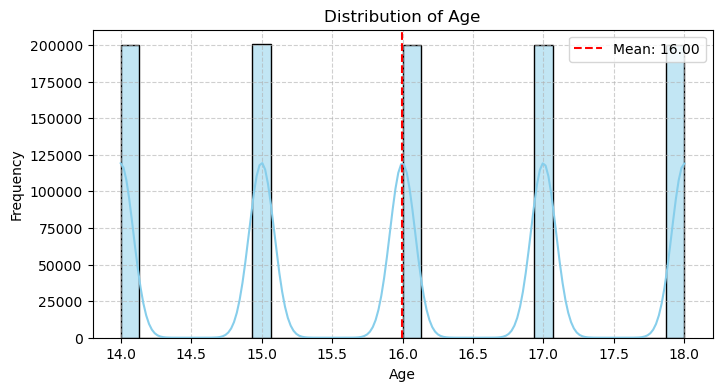

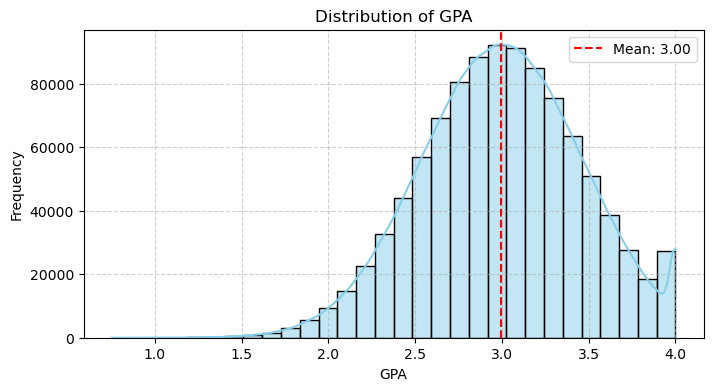

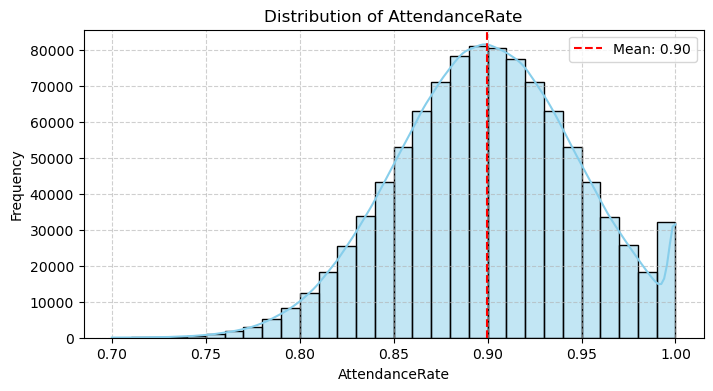

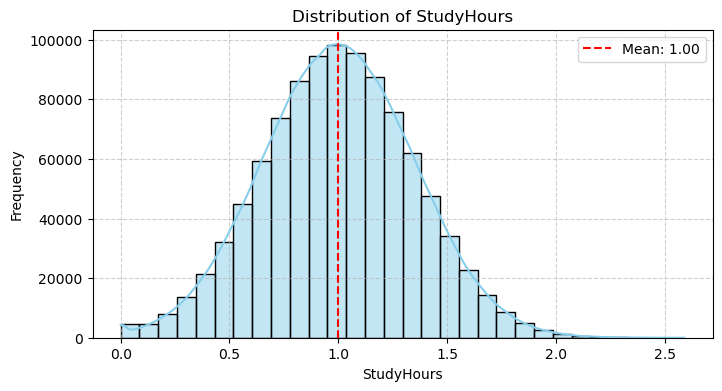

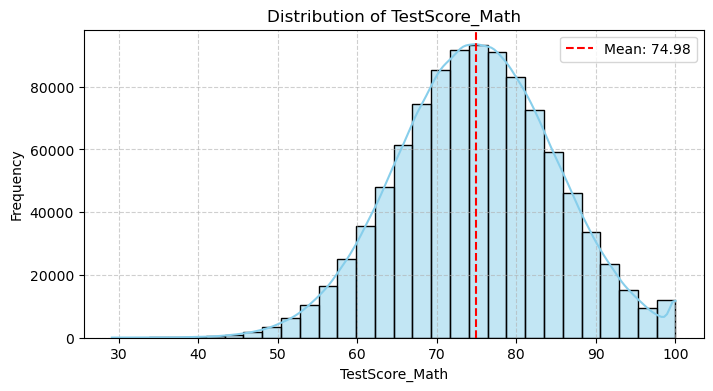

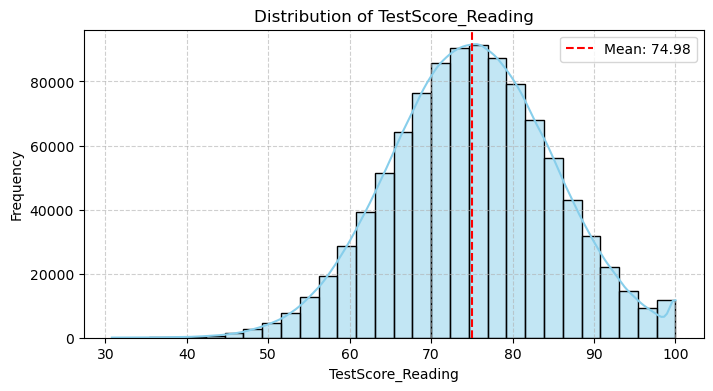

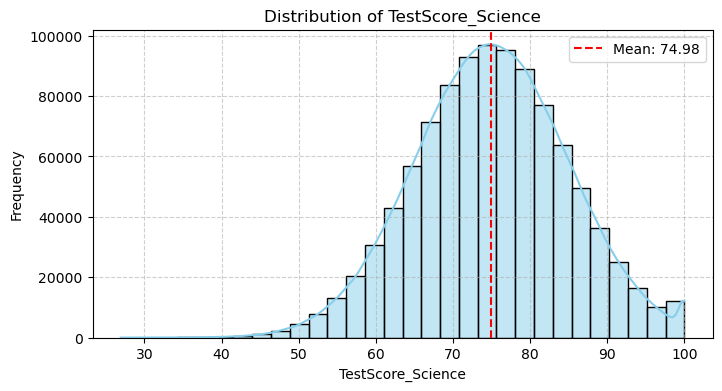

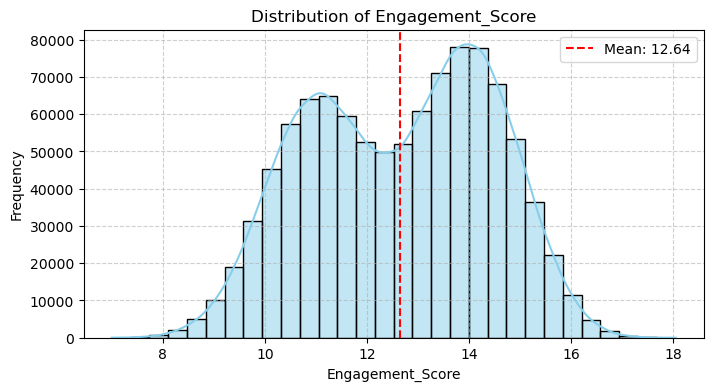

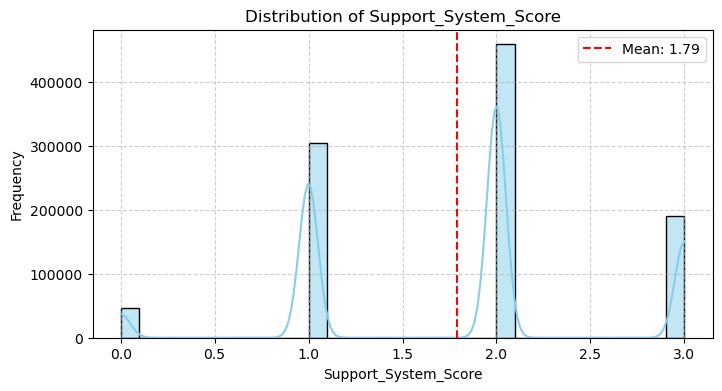

In [7]:
# NUMERICAL DISTRIBUTIONS
num_cols = [
    'Age', 'GPA', 'AttendanceRate', 'StudyHours',
    'TestScore_Math', 'TestScore_Reading', 'TestScore_Science',
    'Engagement_Score', 'Support_System_Score'
]

for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(df[col], bins=30, kde=True, color='skyblue')
        plt.axvline(df[col].mean(), color='red', linestyle='--', label=f"Mean: {df[col].mean():.2f}")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17440\3372467994.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


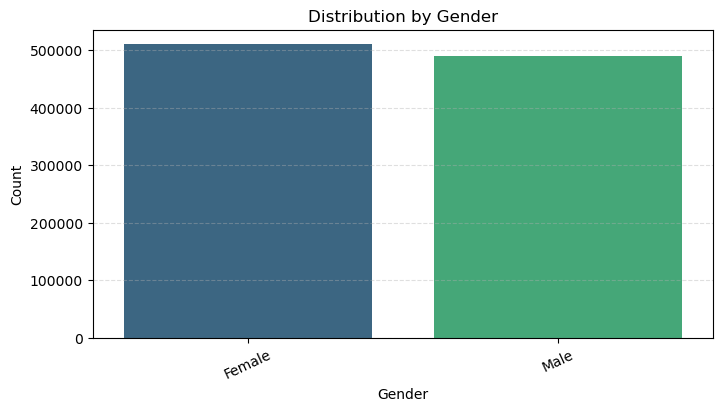

C:\Users\user\AppData\Local\Temp\ipykernel_17440\3372467994.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


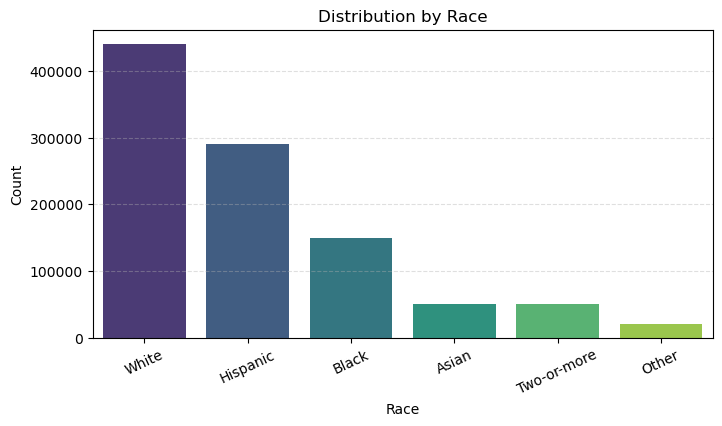

C:\Users\user\AppData\Local\Temp\ipykernel_17440\3372467994.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


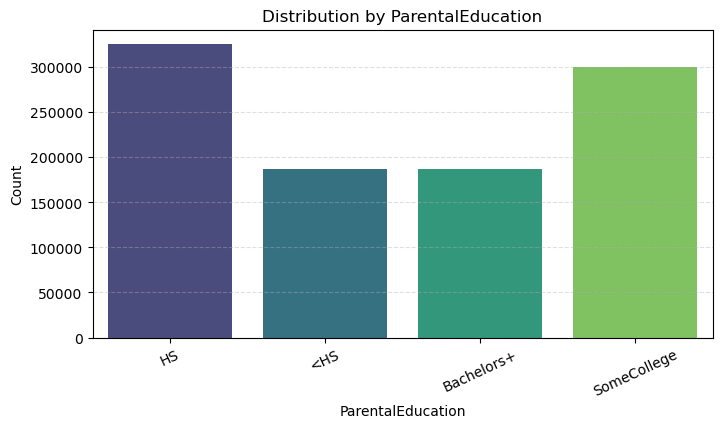

C:\Users\user\AppData\Local\Temp\ipykernel_17440\3372467994.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


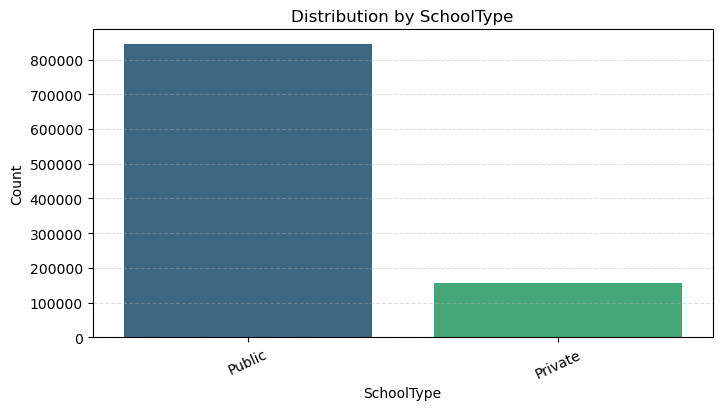

C:\Users\user\AppData\Local\Temp\ipykernel_17440\3372467994.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


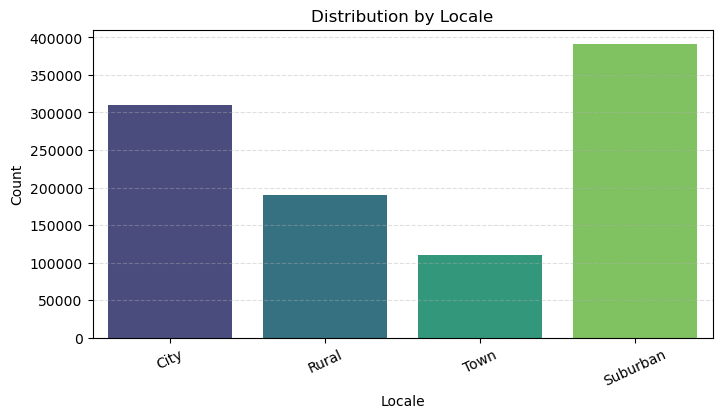

C:\Users\user\AppData\Local\Temp\ipykernel_17440\3372467994.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


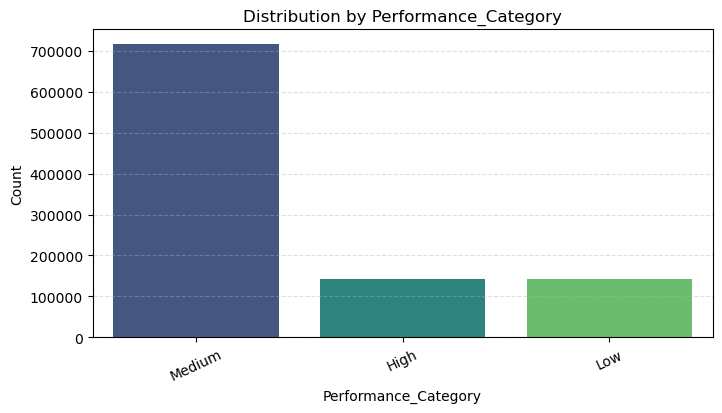

In [8]:
# CATEGORICAL FEATURE ANALYSIS
cat_cols = [
    'Gender', 'Race', 'ParentalEducation',
    'SchoolType', 'Locale', 'Performance_Category'
]

for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col, palette='viridis')
        plt.title(f"Distribution by {col}")
        plt.xticks(rotation=25)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.grid(axis='y', linestyle='--', alpha=0.4)
        plt.show()


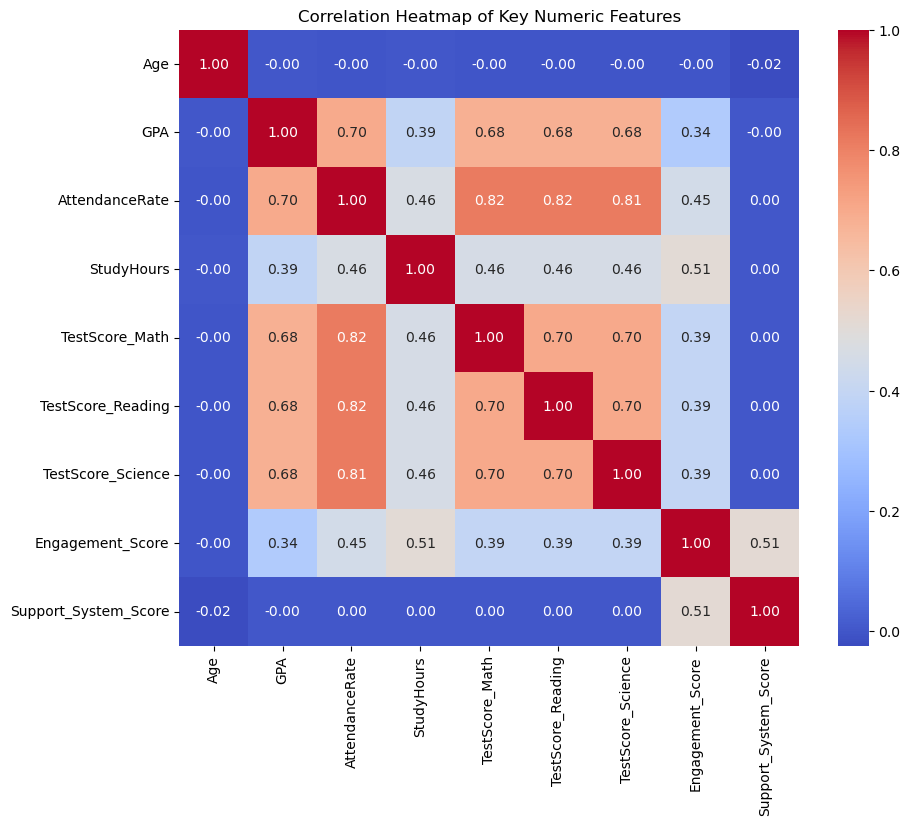

In [9]:
# CORRELATION ANALYSIS
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Key Numeric Features")
plt.show()

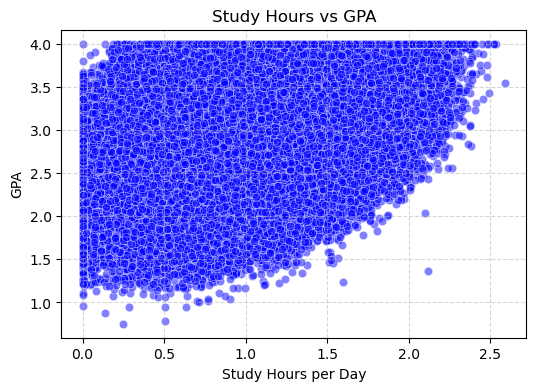

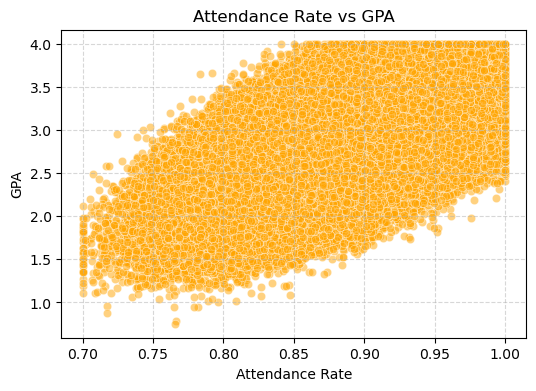

In [10]:
# RELATIONSHIP ANALYSIS (ACADEMIC PERFORMANCE)
# GPA vs Study Hours
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='StudyHours', y='GPA', alpha=0.5, color='blue')
plt.title("Study Hours vs GPA")
plt.xlabel("Study Hours per Day")
plt.ylabel("GPA")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# GPA vs Attendance
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='AttendanceRate', y='GPA', alpha=0.5, color='orange')
plt.title("Attendance Rate vs GPA")
plt.xlabel("Attendance Rate")
plt.ylabel("GPA")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17440\2653857531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Performance_Category', y='Average_Test_Score', palette='cool')


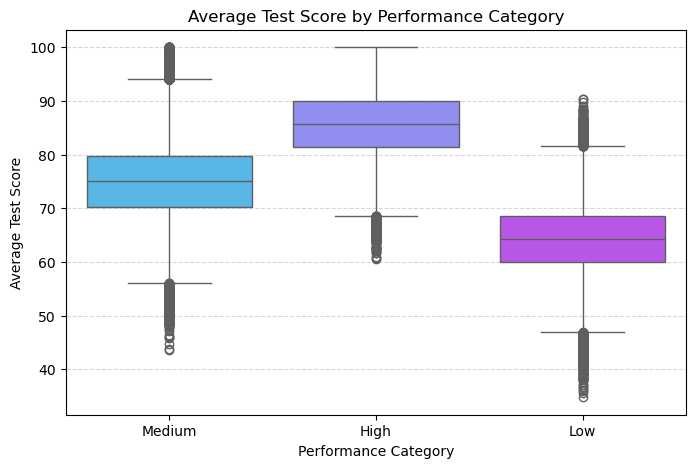

C:\Users\user\AppData\Local\Temp\ipykernel_17440\2653857531.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='SchoolType', y='GPA', palette='mako')


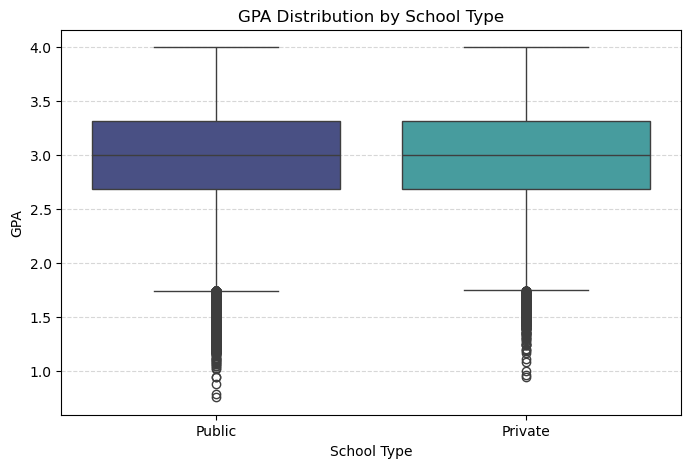

In [11]:
# GROUP PERFORMANCE INSIGHTS
# Average Test Score by Performance Category
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Performance_Category', y='Average_Test_Score', palette='cool')
plt.title("Average Test Score by Performance Category")
plt.xlabel("Performance Category")
plt.ylabel("Average Test Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# GPA by School Type
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='SchoolType', y='GPA', palette='mako')
plt.title("GPA Distribution by School Type")
plt.xlabel("School Type")
plt.ylabel("GPA")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17440\3267181196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='At_Risk', palette='Set2')


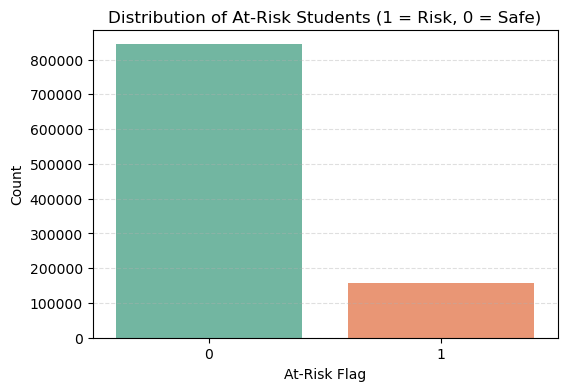


📊 Average GPA, Attendance, and Test Score by Risk Group:
          GPA  AttendanceRate  Average_Test_Score
At_Risk                                          
0        3.09            0.91               77.30
1        2.49            0.83               62.47


In [12]:
# RISK GROUP ANALYSIS
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='At_Risk', palette='Set2')
plt.title("Distribution of At-Risk Students (1 = Risk, 0 = Safe)")
plt.xlabel("At-Risk Flag")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

# Summary comparison
risk_summary = df.groupby('At_Risk')[['GPA', 'AttendanceRate', 'Average_Test_Score']].mean().round(2)
print("\n📊 Average GPA, Attendance, and Test Score by Risk Group:")
print(risk_summary)

C:\Users\user\AppData\Local\Temp\ipykernel_17440\545721474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='SES_Quartile', y='GPA', palette='crest')


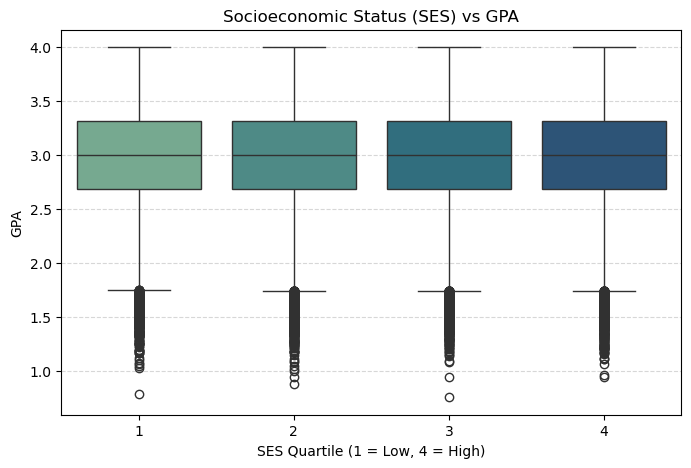

In [13]:
# SOCIOECONOMIC IMPACT
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='SES_Quartile', y='GPA', palette='crest')
plt.title("Socioeconomic Status (SES) vs GPA")
plt.xlabel("SES Quartile (1 = Low, 4 = High)")
plt.ylabel("GPA")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [14]:
# INSIGHT SUMMARY
print("\nEDA Summary Insights:")
print("- Students with higher study hours and attendance have higher GPA.")
print("- Private school students generally score slightly higher GPAs.")
print("- SES_Quartile positively correlates with GPA and test performance.")
print("- At-Risk students show lower GPA, test scores, and attendance.")
print("- Engagement_Score strongly relates to academic outcomes.")


EDA Summary Insights:
- Students with higher study hours and attendance have higher GPA.
- Private school students generally score slightly higher GPAs.
- SES_Quartile positively correlates with GPA and test performance.
- At-Risk students show lower GPA, test scores, and attendance.
- Engagement_Score strongly relates to academic outcomes.
